# Import Lib

In [7]:
import os
import cv2
import math
import random
import pandas as pd 
import numpy as np
from tqdm import tqdm
from sklearn import metrics
from sklearn.model_selection import train_test_split
tqdm.pandas()
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

D:\private_venv\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


# Get data path

In [10]:
SAMPLE_LEN = 100

IMAGE_PATH = r"D:\Coding_practice\code_competition\Plant_Pathology\plant-pathology-2020-fgvc7\images"
TRAIN_PATH = r"D:\Coding_practice\code_competition\Plant_Pathology\plant-pathology-2020-fgvc7\train.csv"
TEST_PATH =  r"D:\Coding_practice\code_competition\Plant_Pathology\plant-pathology-2020-fgvc7\test.csv"
SUB_PATH = r"D:\Coding_practice\code_competition\Plant_Pathology\plant-pathology-2020-fgvc7\sample_submission.csv"

sub = pd.read_csv(SUB_PATH)
train_data = pd.read_csv(TRAIN_PATH)
test_data = pd.read_csv(TEST_PATH)

In [3]:
train_data.head()

image_id  healthy  multiple_diseases  rust  scab
0  Train_0        0                  0     0     1
1  Train_1        0                  1     0     0
2  Train_2        1                  0     0     0
3  Train_3        0                  0     1     0
4  Train_4        1                  0     0     0

In [4]:
test_data.head()

image_id
0   Test_0
1   Test_1
2   Test_2
3   Test_3
4   Test_4

In [11]:
def load_image(image_id):
    file_path = image_id + ".jpg"
    image = cv2.imread(os.path.join(IMAGE_PATH, file_path))
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

sample_class = np.where(train_data['healthy']==1)
# train_images = train_data['image_id'][list(sample_class)[0][:100]].progress_apply(load_image)
train_images = train_data['image_id'][:SAMPLE_LEN].progress_apply(load_image)





  0%|          | 0/100 [00:00<?, ?it/s]



  2%|▏         | 2/100 [00:00<00:14,  6.57it/s]



  6%|▌         | 6/100 [00:00<00:10,  8.62it/s]



  9%|▉         | 9/100 [00:00<00:08, 10.92it/s]



 13%|█▎        | 13/100 [00:00<00:06, 13.58it/s]



 17%|█▋        | 17/100 [00:00<00:05, 16.17it/s]



 20%|██        | 20/100 [00:00<00:04, 18.64it/s]



 24%|██▍       | 24/100 [00:01<00:03, 21.06it/s]



 27%|██▋       | 27/100 [00:01<00:03, 23.08it/s]



 31%|███       | 31/100 [00:01<00:02, 25.00it/s]



 34%|███▍      | 34/100 [00:01<00:02, 26.30it/s]



 37%|███▋      | 37/100 [00:01<00:02, 27.27it/s]



 40%|████      | 40/100 [00:01<00:02, 26.69it/s]



 43%|████▎     | 43/100 [00:01<00:02, 27.42it/s]



 47%|████▋     | 47/100 [00:01<00:01, 28.23it/s]



 50%|█████     | 50/100 [00:01<00:01, 27.66it/s]



 54%|█████▍    | 54/100 [00:02<00:01, 28.81it/s]



 58%|█████▊    | 58/100 [00:02<00:01, 29.27it/s]



 62%|██████▏   | 62/100 [00:02<00:01, 29.46it/s]



 66%|██████▌   | 66/

In [12]:
train_images.index
# train_images[18]

RangeIndex(start=0, stop=100, step=1)

# Visualize one leaf

In [13]:
fig = px.imshow(cv2.resize(train_images[random.choice(train_images.index)],(205,136)))
fig.show()

# Channel distribution

In [14]:
red_values = [np.mean(train_images[idx][:,:,0]) for idx in train_images.index]
green_values = [np.mean(train_images[idx][:,:,1]) for idx in train_images.index]
blue_values = [np.mean(train_images[idx][:,:,2]) for idx in train_images.index]

values = [np.mean(train_images[idx]) for idx in train_images.index]

# All channel values

In [15]:
fig = ff.create_distplot([values], group_labels=["Channels"], colors=["purple"])
fig.update_layout(showlegend=False, template="simple_white")
fig.update_layout(title_text="Distributrion of channel values")
fig.data[0].marker.line.color = 'rgb(0,0,0)'
fig.data[0].marker.line.width = 1
fig

In [ ]:
fig = ff.create_distplot([red_values], group_labels=["R"], colors=["red"])
fig.update_layout(showlegend=False, template="simple_white")
fig.update_layout(title_text="Distributrion of red channel values")
fig.data[0].marker.line.color = 'rgb(0,0,0)'
fig.data[0].marker.line.width = 1
fig

In [32]:
fig = ff.create_distplot([green_values], group_labels=["G"], colors=["green"])
fig.update_layout(showlegend=False, template="simple_white")
fig.update_layout(title_text="Distributrion of green channel values")
fig.data[0].marker.line.color = 'rgb(0,0,0)'
fig.data[0].marker.line.width = 1
fig

In [31]:
fig = ff.create_distplot([blue_values], group_labels=["B"], colors=["blue"])
fig.update_layout(showlegend=False, template="simple_white")
fig.update_layout(title_text="Distributrion of blue channel values")
fig.data[0].marker.line.color = 'rgb(0,0,0)'
fig.data[0].marker.line.width = 1
fig

In [16]:
fig = go.Figure()

for idx, values in enumerate([red_values, green_values, blue_values]):
    if idx == 0:
        color = "Red"
    if idx == 1:
        color = "Green"
    if idx == 2:
        color = "Blue"
    fig.add_trace(go.Box(x=[color] * len(values) , y= values, name=color, marker=dict(color=color.lower())))

fig.update_layout(yaxis_title="Mean value", xaxis_title="Color channel", title="Mean value vs. Color channel",template="plotly_white")

In [17]:
fig = ff.create_distplot([red_values, green_values, blue_values], group_labels=["R","G","B"], colors=["red","green","blue"])
fig.update_layout(showlegend=False, template="simple_white")
fig.update_layout(title_text="Distributrion of all channel values")
fig.data[0].marker.line.color = 'rgb(0,0,0)'
fig.data[0].marker.line.width = 1
fig.data[1].marker.line.color = 'rgb(0,0,0)'
fig.data[1].marker.line.width = 1
fig.data[2].marker.line.color = 'rgb(0,0,0)'
fig.data[2].marker.line.width = 1
fig

# Visualize sample leaves

In [18]:
def visualize_leaves(cond=[0, 0, 0, 0], cond_cols=["healthy"], is_cond=True):
    if not is_cond:
        cols, rows = 3, min([3, len(train_images)//3])
        fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(30, rows*20/3))
        for col in range(cols):
            for row in range(rows):
                ax[row, col].imshow(train_images.loc[train_images.index[-row*3-col-1]])
        return None
        
    cond_0 = "healthy == {}".format(cond[0])
    cond_1 = "scab == {}".format(cond[1])
    cond_2 = "rust == {}".format(cond[2])
    cond_3 = "multiple_diseases == {}".format(cond[3])
    
    cond_list = []
    for col in cond_cols:
        if col == "healthy":
            cond_list.append(cond_0)
        if col == "scab":
            cond_list.append(cond_1)
        if col == "rust":
            cond_list.append(cond_2)
        if col == "multiple_diseases":
            cond_list.append(cond_3)
    
    data = train_data.loc[:100]
    for cond in cond_list:
        data = data.query(cond)
        
    images = train_images.loc[list(data.index)]
    cols, rows = 3, min([3, len(images)//3])
    
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(30, rows*20/3))
    for col in range(cols):
        for row in range(rows):
            ax[row, col].imshow(images.loc[images.index[row*3+col]])
    plt.show()

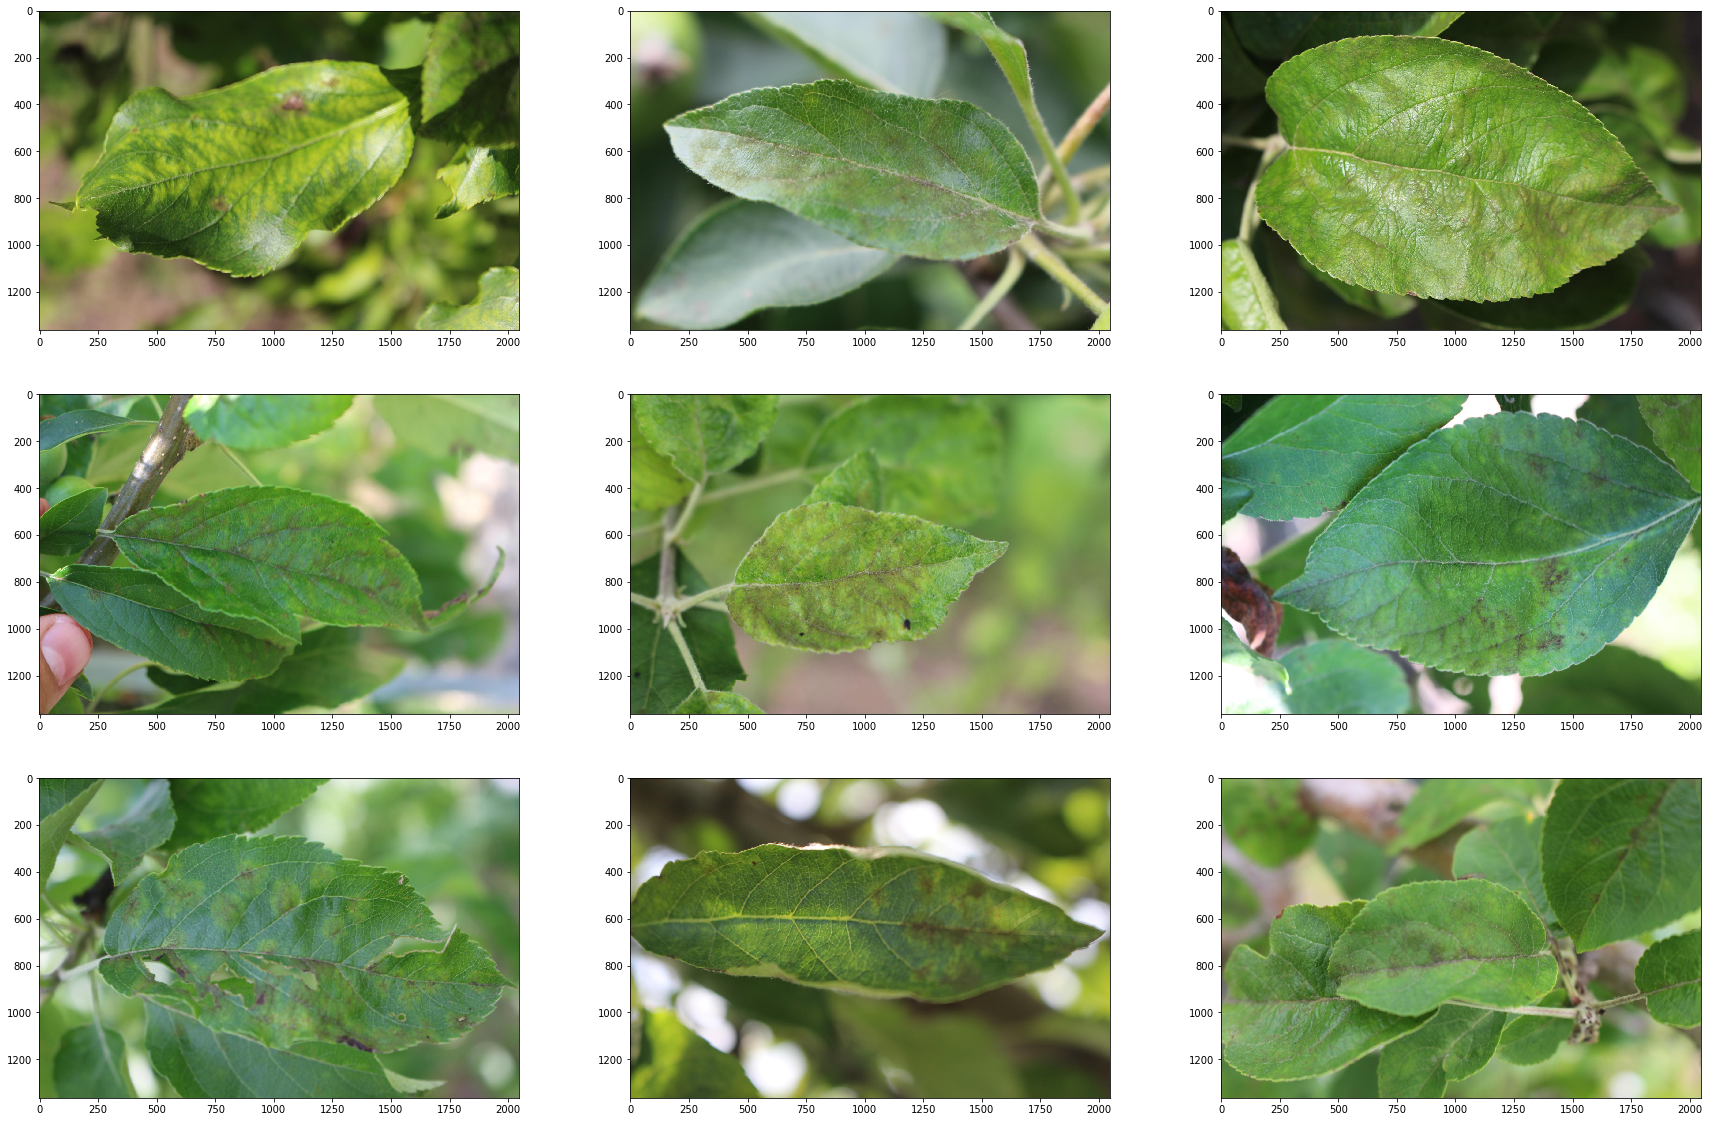

In [30]:
visualize_leaves(cond=[0, 1, 0, 0], cond_cols=["scab"])

In [20]:
fig = px.parallel_categories(train_data[["healthy","scab","rust","multiple_diseases"]], color='healthy', color_continuous_scale="sunset",\
title="Parallel categories plot of targets")
fig

In [21]:
fig = go.Figure([go.Pie(labels=train_data.columns[1:], values=train_data.iloc[:, 1:].sum().values)])

fig.update_layout(title_text="Pie chart of targets", template='simple_white')
fig.data[0].marker.line.color='rgb(0,0,0)'
fig.data[0].marker.line.width=0.5
fig.show()

In [ ]:
train_data.columns.values[1:]

In [22]:
train_data["Healthy"] = train_data["healthy"].apply(bool).apply(str)
train_data["Multiple_diseases"] = train_data["multiple_diseases"].apply(bool).apply(str)
train_data["Rust"] = train_data['rust'].apply(bool).apply(str)
train_data["Scrab"] = train_data['scab'].apply(bool).apply(str)

# print(train_data["Healthy"].values)
print(np.sum(train_data["Healthy"].values=='True'))
# print(sum(np.where(train_data["Healthy"].values=='True')))
# df = px.data.tips()
# print(df)
fig = go.Figure()
# fig.add_trace(go.Histogram(x=["Healthy"], y=[train_data["Healthy"].values=='True'], name='count'))
fig = px.histogram(train_data, x="Rust", title="Data distribution", color="Rust",\
            color_discrete_map={
                "True": px.colors.qualitative.Plotly[0],
                "False": px.colors.qualitative.Plotly[1]})
fig.update_layout(template="simple_white")
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.data[0].marker.line.width = 0.5
fig.data[1].marker.line.color = 'rgb(0, 0, 0)'
fig.data[1].marker.line.width = 0.5
fig.show()

516


In [23]:
def edge_and_cut(img):
    emb_img = img.copy()
    edges = cv2.Canny(img, 100, 200)
    edge_coors = []
    for i in range(edges.shape[0]):
        for j in range(edges.shape[1]):
            if edges[i][j] != 0:
                edge_coors.append((i, j))
    
    row_min = edge_coors[np.argsort([coor[0] for coor in edge_coors])[0]][0]
    row_max = edge_coors[np.argsort([coor[0] for coor in edge_coors])[-1]][0]
    col_min = edge_coors[np.argsort([coor[1] for coor in edge_coors])[0]][1]
    col_max = edge_coors[np.argsort([coor[1] for coor in edge_coors])[-1]][1]
    new_img = img[row_min:row_max, col_min:col_max]
    
    emb_img[row_min-10:row_min+10, col_min:col_max] = [255, 0, 0]
    emb_img[row_max-10:row_max+10, col_min:col_max] = [255, 0, 0]
    emb_img[row_min:row_max, col_min-10:col_min+10] = [255, 0, 0]
    emb_img[row_min:row_max, col_max-10:col_max+10] = [255, 0, 0]
    
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 20))
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Original Image', fontsize=24)
    ax[1].imshow(edges, cmap='gray')
    ax[1].set_title('Canny Edges', fontsize=24)
    ax[2].imshow(emb_img, cmap='gray')
    ax[2].set_title('Bounding Box', fontsize=24)
    plt.show()

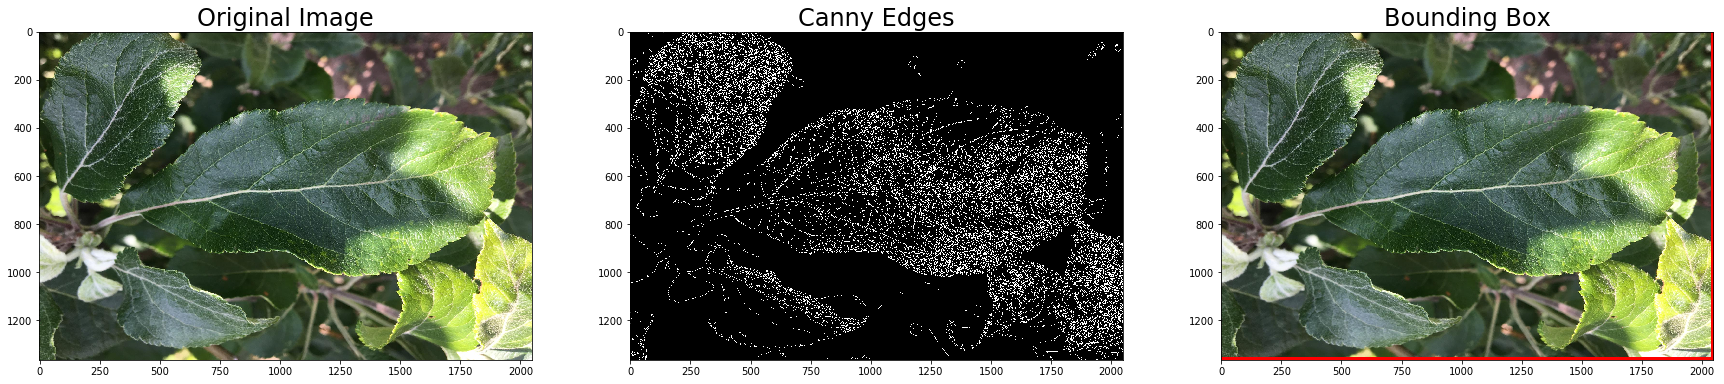

In [24]:
edge_and_cut(train_images[random.choice(train_images.index)])

In [25]:
def channels_visualize(img):
    process_img = img.copy()
    r_channel = process_img[:,:,0]
    g_channel = process_img[:,:,1]
    b_channel = process_img[:,:,2]
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(30, 20))
    ax[0].imshow(r_channel)
    ax[0].set_title('Red channel Image', fontsize=24)
    ax[1].imshow(g_channel)
    ax[1].set_title('Green channel Image', fontsize=24)
    ax[2].imshow(b_channel)
    ax[2].set_title('Blue channel Image', fontsize=24)
    ax[3].imshow(process_img, cmap='gray')
    ax[3].set_title('Original Image', fontsize=24)
    plt.show()

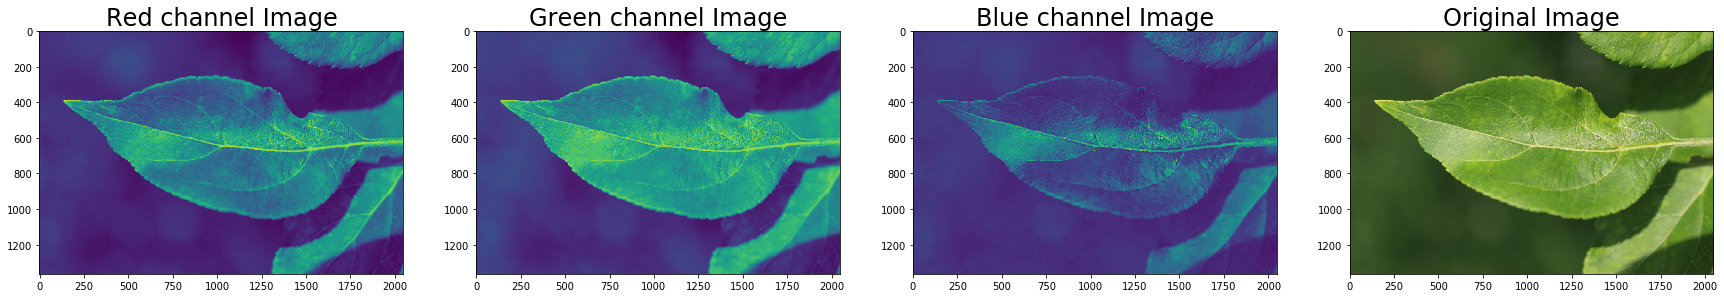

In [26]:
channels_visualize(train_images[random.choice(train_images.index)])

In [27]:
def conv(img):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
    kernel = np.ones((7, 7), np.float32)/25
    conv = cv2.filter2D(img, -1, kernel)
    ax[0].imshow(img)
    ax[0].set_title('Original Image', fontsize=24)
    ax[1].imshow(conv)
    ax[1].set_title('Convolved Image', fontsize=24)
    plt.show()

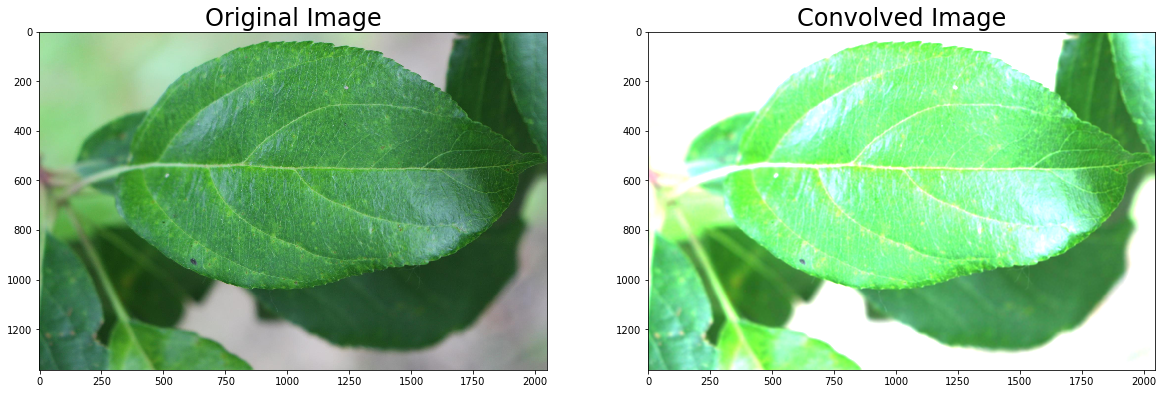

In [28]:
conv(train_images[random.choice(train_images.index)])

In [ ]:
def blur(img):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
    ax[0].imshow(img)
    ax[0].set_title('Original Image', fontsize=24)
    ax[1].imshow(cv2.blur(img, (25, 25)))
    ax[1].set_title('Blurred Image', fontsize=24)
    plt.show()

In [ ]:
blur(train_images[random.choice(train_images.index)])